In [1]:
import matplotlib.pyplot as plt
import jax.numpy as np
from jax import grad, jit, vmap
import pandas as pd
from typing import Tuple, Callable, Dict, List

In [2]:
Cts = Callable[float, float]  # not true, but works for know


def deriv(f: Cts) -> Cts:
    df = grad(f)
    return lambda xs: np.array([df(x) for x in xs])


def to_df(an, bn, pn, fpn):
    return pd.DataFrame({"a_n": an, "b_n": bn, "p_n": pn, "f(p_n)": fpn})


def f1(x):
    return np.sin(np.power(x - 1, 2)) / 2


def f2(x):
    return np.power(5, -x) - 2


def f3(x):
    return np.power(x, 2)

In [3]:
def Bisection(f: Cts, x: Tuple[float, float], eps=1e-4, max_iter=15):
    start, end = x
    a = [start]
    b = [end]
    mid = lambda a, b: a + (b - a) / 2
    p = []
    fp = []
    for i in range(max_iter):
        p.append(mid(a[i], b[i]))
        fp.append(f(p[i]))
        if fp[i] == 0 or (b[i] - a[i]) / 2 < eps:
            break
        if fp[i] * f(a[i]) > 0:
            a.append(p[i])
            b.append(b[i])
        else:
            a.append(a[i])
            b.append(p[i])
    return to_df(a, b, p, fp)

In [4]:
x = np.linspace(-1, 2)

In [5]:
res = Bisection(f1, (1, 2))
res

,a_n,b_n,p_n,f(p_n)
0,1,2.000000,1.500000,0.12370198
1,1,1.500000,1.250000,0.031229658
2,1,1.250000,1.125000,0.007812182
3,1,1.125000,1.062500,0.00195312
4,1,1.062500,1.031250,0.00048828116
5,1,1.031250,1.015625,0.00012207031
6,1,1.015625,1.007812,3.0517578e-05
7,1,1.007812,1.003906,7.6293945e-06
8,1,1.003906,1.001953,1.9073486e-06
9,1,1.001953,1.000977,4.7683716e-07


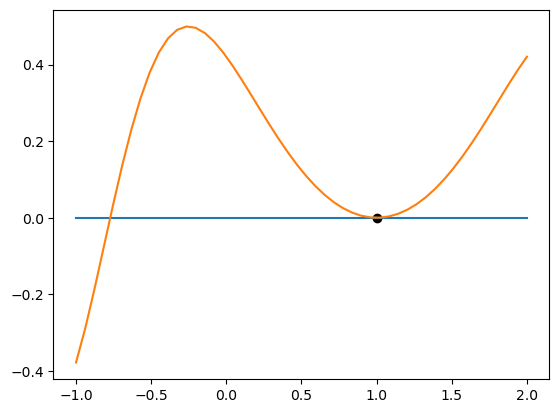

In [6]:
y = f1(x)
plt.scatter([res["p_n"].iat[-1]], [0], color="black")
plt.plot(x, np.zeros(np.shape(x)))
plt.plot(x, y)